In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
# reading the dataset
diamond = pd.read_csv("D:/Git/Unicamp/Machine_Learning/Trabalho1/linear_regression/diamonds-train.csv")

In [3]:
print(diamond.head())
diamond.dtypes

   carat        cut color clarity     x     y     z  depth  table  price
0   1.62      Ideal     I     VS2  7.53  7.58  4.69   62.1   55.0  10501
1   0.30    Premium     G     SI1  4.39  4.35  2.57   58.8   60.0    574
2   1.37      Ideal     F     VS1  7.28  7.22  4.32   59.6   57.0  11649
3   0.33       Fair     H    VVS2  4.40  4.32  2.84   65.1   59.0    922
4   0.32  Very Good     F     VS2  4.43  4.48  2.62   58.8   62.0    602


carat      float64
cut         object
color       object
clarity     object
x          float64
y          float64
z          float64
depth      float64
table      float64
price        int64
dtype: object

In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 10 columns):
carat      45849 non-null float64
cut        45849 non-null object
color      45849 non-null object
clarity    45849 non-null object
x          45849 non-null float64
y          45849 non-null float64
z          45849 non-null float64
depth      45849 non-null float64
table      45849 non-null float64
price      45849 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [5]:
print(diamond.describe())

              carat             x             y             z         depth  \
count  45849.000000  45849.000000  45849.000000  45849.000000  45849.000000   
mean       0.797698      5.731171      5.734044      3.537613     61.744716   
std        0.473863      1.121454      1.140275      0.694809      1.428341   
min        0.200000      0.000000      0.000000      0.000000     43.000000   
25%        0.400000      4.710000      4.720000      2.910000     61.000000   
50%        0.700000      5.700000      5.710000      3.520000     61.800000   
75%        1.040000      6.540000      6.540000      4.030000     62.500000   
max        5.010000     10.740000     58.900000      8.060000     78.200000   

              table         price  
count  45849.000000  45849.000000  
mean      57.455582   3932.515562  
std        2.237592   3990.380545  
min       43.000000    326.000000  
25%       56.000000    950.000000  
50%       57.000000   2401.000000  
75%       59.000000   5322.000000  


In [6]:
diamond = diamond.drop(diamond.loc[diamond.x <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.y <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.z <= 0].index)

In [7]:
diamond["ratio"] = diamond.x / diamond.y

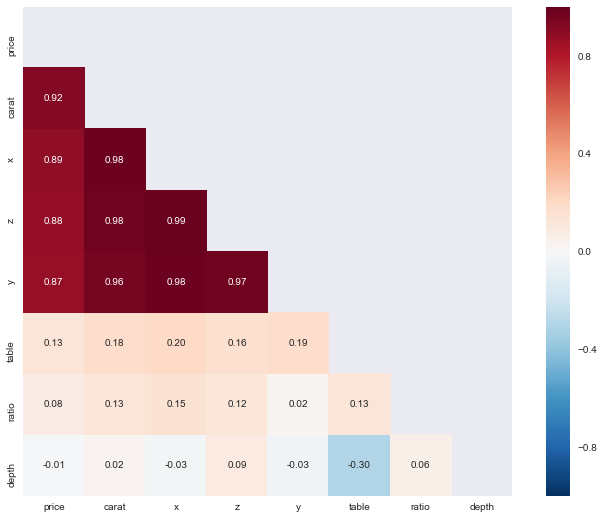

In [8]:
#correlation matrix for 15 variables with largest correlation
corrmat = diamond.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(diamond[cols].values.T)

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [10]:
#Executar uma única vez
diamond.cut = diamond.cut.map(diamond_cut);
diamond.clarity = diamond.clarity.map(diamond_clarity);
diamond.color = diamond.color.map(diamond_color);

print(diamond.head())
print(diamond.describe())

   carat  cut  color  clarity     x     y     z  depth  table  price     ratio
0   1.62    4      1        3  7.53  7.58  4.69   62.1   55.0  10501  0.993404
1   0.30    3      3        2  4.39  4.35  2.57   58.8   60.0    574  1.009195
2   1.37    4      4        4  7.28  7.22  4.32   59.6   57.0  11649  1.008310
3   0.33    0      2        5  4.40  4.32  2.84   65.1   59.0    922  1.018519
4   0.32    2      4        3  4.43  4.48  2.62   58.8   62.0    602  0.988839
              carat          cut         color       clarity             x  \
count  45832.000000  45832.00000  45832.000000  45832.000000  45832.000000   
mean       0.797442      2.90463      3.411285      3.047870      5.731348   
std        0.473642      1.11711      1.701807      1.641954      1.119626   
min        0.200000      0.00000      0.000000      0.000000      3.730000   
25%        0.400000      2.00000      2.000000      2.000000      4.710000   
50%        0.700000      3.00000      3.000000      3.0000

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

X = diamond.drop(['price'],1)
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
# min max or standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,verbose = 1)
print('Linear regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Linear regression accuracy:  0.910141853452
[ 0.90833954  0.90910099  0.89960822 -8.0516349   0.90912981]
mean = -0.8850912663689112, std = 3.5832736175672775


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [33]:
prediction_Y = classifier.predict(X_test)

In [34]:
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction_Y))

Coefficients: 
 [ 5224.31911212   132.70269389   553.7312858    822.66828836  -226.3549127
   -35.21217437  -821.62148867   -14.79773292   -61.30147559   -78.72427085]
Intercept: 
 3939.23941088
Mean squared error: 1452116.99
